#1 data pre-processing

In [1]:
# data pre-processing
import pandas as pd

raw_data = pd.read_csv('/mnt/c/Users/ouyangkang/Desktop/chenchen_data.csv')
raw_data.drop(['Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21'], axis=1, inplace=True)

print(f"gender:{set(raw_data['Gender'].tolist())}")
print(f"location:{set(raw_data['Location'].tolist())}")
print(f"grade:{set(raw_data['Grade'].tolist())}")
print(f"invasive:{set(raw_data['Invasive'].tolist())}")
print(f"WGD:{set(raw_data['Facets_WGD'].tolist())}")
print(f"ecDNA:{set(raw_data['ecDNA_status'].tolist())}")
print(f"chromothipsis:{set(raw_data['Chromothripsis'].tolist())}")

# string to figures
raw_data['Gender'] = [1 if "F" in _ else 0 for _ in raw_data['Gender']]
raw_data['Grade'] = [1 if "H" in _ else 0 for _ in raw_data['Grade']]
raw_data['Invasive'] = [1 if "Y" in _ else 0 for _ in raw_data['Invasive']]
raw_data['Facets_WGD'] = [1 if _ is True else 0 for _ in raw_data['Facets_WGD']]
raw_data['ecDNA_status'] = [1 if "P" in _ else 0 for _ in raw_data['ecDNA_status']]
raw_data['Chromothripsis'] = [1 if "Y" in _ else 0 for _ in raw_data['Chromothripsis']]
convert_data = raw_data.replace({"Location":{'Bladder': 2, 'Pelvis': 1, 'Ureter': 0}})

# columns selections and order columns
selections_data = convert_data[convert_data.columns.difference(['SampleName', 'OS_time'])]
order_columns = selections_data.columns.tolist()
order_columns.remove('OS_status')
order_columns = order_columns + ['OS_status']
selections_data = selections_data[order_columns]
selections_data

gender:{'Female', 'Male'}
location:{'Ureter', 'Bladder', 'Pelvis'}
grade:{'Low', 'High'}
invasive:{'No', 'Yes'}
WGD:{False, True}
ecDNA:{'Negative', 'Positive'}
chromothipsis:{'No', 'Yes'}


,Age,BFB,Chromothripsis,FGFR3,Facets_FGA,Facets_WGD,Facets_ploidy,Gender,Grade,Invasive,Location,Mig_Cluster,RB1,STAG2,TP53,ecDNA_status,OS_status
0,58,1,0,0,0.206562,1,3.266351,0,1,1,2,2,0,0,1,1,1
1,52,0,1,0,0.598244,1,4.267081,0,1,0,2,2,1,0,1,1,0
2,54,0,0,0,0.160984,0,2.263420,0,0,0,2,2,0,0,0,0,0
3,56,0,0,1,0.204446,0,2.268868,0,0,0,2,3,0,0,0,0,0
4,57,0,0,0,0.275997,1,3.422798,0,1,0,2,2,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,75,0,0,1,0.054494,0,2.000000,0,1,0,0,4,0,0,0,0,0
444,75,0,1,0,0.208465,1,4.988768,1,1,0,0,2,0,0,0,1,0
445,74,0,0,1,0.069131,0,2.072303,1,1,1,0,3,0,1,1,0,0
446,41,1,1,0,0.463625,1,3.861531,0,1,0,0,3,0,0,0,1,0


In [2]:
# create train set and test set
from sklearn.model_selection import train_test_split
import numpy as np

x_train, x_test, y_train, y_test = np.array(train_test_split(selections_data[selections_data.columns.difference(['OS_status'])], selections_data['OS_status'], random_state=0))

/tmp/ipykernel_8919/1439299246.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, x_test, y_train, y_test = np.array(train_test_split(selections_data[selections_data.columns.difference(['OS_status'])], selections_data['OS_status'], random_state=0))


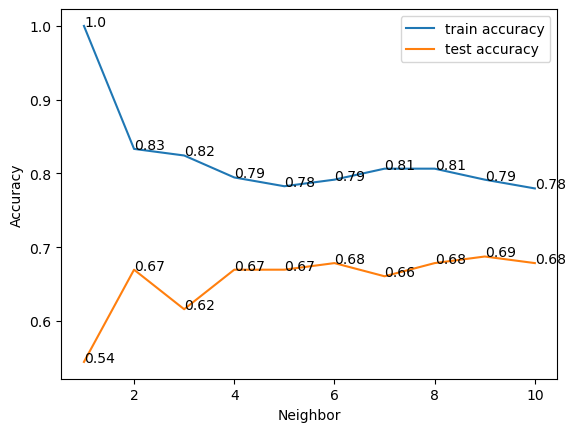

In [5]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

train_accuracy = []
test_accuracy = []
neighbors = range(1,11)

for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(x_train, y_train)
    knn.score(x_test, y_test)
    train_accuracy.append(knn.score(x_train, y_train))
    test_accuracy.append(knn.score(x_test,y_test))

plt.plot(neighbors, train_accuracy, label='train accuracy')
plt.plot(neighbors, test_accuracy, label='test accuracy')
for i,j in zip(neighbors, train_accuracy):
    plt.text(i,j,round(j,2))
for i,j in zip(neighbors, test_accuracy):
    plt.text(i,j,round(j,2))
plt.xlabel("Neighbor")
plt.ylabel("Accuracy")
plt.legend()
